# 1

## One Hot Encoding of text

This implements one hot encoding. 
 
In real world projects one mostly uses scikit -learn’s implementation of one hot encoding

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install scikit-learn==0.21.3

# ===========================

In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [ ]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

In [ ]:
#Build the vocabulary
vocab = {}
count = 0
for doc in processed_docs:
    for word in doc.split():
        if word not in vocab:
            count = count +1
            vocab[word] = count
print(vocab)

{'dog': 1, 'bites': 2, 'man': 3, 'eats': 4, 'meat': 5, 'food': 6}


In [ ]:
#Get one hot representation for any string based on this vocabulary. 
#If the word exists in the vocabulary, its representation is returned. 
#If not, a list of zeroes is returned for that word. 
def get_onehot_vector(somestring):
    onehot_encoded = []
    for word in somestring.split():
        temp = [0]*len(vocab)
        if word in vocab:
            temp[vocab[word]-1] = 1 # -1 is to take care of the fact indexing in array starts from 0 and not 1
        onehot_encoded.append(temp)
    return onehot_encoded

In [ ]:
print(processed_docs[1])
get_onehot_vector(processed_docs[1]) #one hot representation for a text from our corpus.

man bites dog


[[0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0]]

In [ ]:
get_onehot_vector("man and dog are good") 
#one hot representation for a random text, using the above vocabulary

[[0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [ ]:
get_onehot_vector("man and man are good") 

[[0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

## One-hot encoding using scikit -learn
##### We encode our corpus as a one-hot numeric array using scikit-learn's OneHotEncoder.
##### We will demostrate:

*   One Hot Encoding: In one-hot encoding, each word w in corpus vocabulary is given a unique integer id wid that is between 1 and |V|, where V is the set of corpus vocab. Each word is then represented by a V-dimensional binary vector of 0s and 1s.

*   Label Encoding: In Label Encoding, each word w in our corpus is converted into a numeric value between 0 and n-1 (where n refers to number of unique words in our corpus).

##### Link for the official documentation of both can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) respectively.








In [ ]:
S1 = 'dog bites man'
S2 = 'man bites dog'
S3 = 'dog eats meat'
S4 = 'man eats food'

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = [S1.split(), S2.split(), S3.split(), S4.split()]
values = data[0]+data[1]+data[2]+data[3]
print("The data: ",values)

#Label Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("Label Encoded:",integer_encoded)

#One-Hot Encoding
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(data).toarray()
print("Onehot Encoded Matrix:\n",onehot_encoded)


The data:  ['dog', 'bites', 'man', 'man', 'bites', 'dog', 'dog', 'eats', 'meat', 'man', 'eats', 'food']
Label Encoded: [1 0 4 4 0 1 1 2 5 4 2 3]
Onehot Encoded Matrix:
 [[1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0.]]


# 2

## Bag of Words

In the last notebook, we saw how to get the one hot encoding representation for our toy corpus. In this notebook we will see how to use bag of words representation for the same data..

## One Hot Encoding of text

This implements one hot encoding. 
 
In real world projects one mostly uses scikit -learn’s implementation of one hot encoding

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install scikit-learn==0.21.3

# ===========================

In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [ ]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

In [ ]:
#Build the vocabulary
vocab = {}
count = 0
for doc in processed_docs:
    for word in doc.split():
        if word not in vocab:
            count = count +1
            vocab[word] = count
print(vocab)

{'dog': 1, 'bites': 2, 'man': 3, 'eats': 4, 'meat': 5, 'food': 6}


In [ ]:
#Get one hot representation for any string based on this vocabulary. 
#If the word exists in the vocabulary, its representation is returned. 
#If not, a list of zeroes is returned for that word. 
def get_onehot_vector(somestring):
    onehot_encoded = []
    for word in somestring.split():
        temp = [0]*len(vocab)
        if word in vocab:
            temp[vocab[word]-1] = 1 # -1 is to take care of the fact indexing in array starts from 0 and not 1
        onehot_encoded.append(temp)
    return onehot_encoded

In [ ]:
print(processed_docs[1])
get_onehot_vector(processed_docs[1]) #one hot representation for a text from our corpus.

man bites dog


[[0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0]]

In [ ]:
get_onehot_vector("man and dog are good") 
#one hot representation for a random text, using the above vocabulary

[[0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [ ]:
get_onehot_vector("man and man are good") 

[[0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

## One-hot encoding using scikit -learn
##### We encode our corpus as a one-hot numeric array using scikit-learn's OneHotEncoder.
##### We will demostrate:

*   One Hot Encoding: In one-hot encoding, each word w in corpus vocabulary is given a unique integer id wid that is between 1 and |V|, where V is the set of corpus vocab. Each word is then represented by a V-dimensional binary vector of 0s and 1s.

*   Label Encoding: In Label Encoding, each word w in our corpus is converted into a numeric value between 0 and n-1 (where n refers to number of unique words in our corpus).

##### Link for the official documentation of both can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) respectively.








In [ ]:
S1 = 'dog bites man'
S2 = 'man bites dog'
S3 = 'dog eats meat'
S4 = 'man eats food'

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = [S1.split(), S2.split(), S3.split(), S4.split()]
values = data[0]+data[1]+data[2]+data[3]
print("The data: ",values)

#Label Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("Label Encoded:",integer_encoded)

#One-Hot Encoding
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(data).toarray()
print("Onehot Encoded Matrix:\n",onehot_encoded)


The data:  ['dog', 'bites', 'man', 'man', 'bites', 'dog', 'dog', 'eats', 'meat', 'man', 'eats', 'food']
Label Encoded: [1 0 4 4 0 1 1 2 5 4 2 3]
Onehot Encoded Matrix:
 [[1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0.]]


In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install scikit-learn==0.21.3

# ===========================

  Using cached scikit_learn-0.21.3-cp36-cp36m-win_amd64.whl (5.9 MB)
  Using cached scipy-1.5.4-cp36-cp36m-win_amd64.whl (31.2 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached numpy-1.19.5-cp36-cp36m-win_amd64.whl (13.2 MB)


In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [ ]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."] #Same as the earlier notebook
processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

Now, let's do the main task of finding bag of words representation. We will use CountVectorizer from sklearn. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#look at the documents list
print("Our corpus: ", processed_docs)

count_vect = CountVectorizer()
#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for 'dog bites man': ", bow_rep[0].toarray())
print("BoW representation for 'man bites dog: ",bow_rep[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our corpus:  ['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']
Our vocabulary:  {'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}
BoW representation for 'dog bites man':  [[1 1 0 0 1 0]]
BoW representation for 'man bites dog:  [[1 1 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 2 0 0 0 0]]


In the above code, we represented the text considering the frequency of words into account. However, sometimes, we don't care about frequency much, but only want to know whether a word appeared in a text or not. That is, each document is represented as a vector of 0s and 1s. We will use the option binary=True in CountVectorizer for this purpose. 

In [ ]:
#BoW with binary vectors
count_vect = CountVectorizer(binary=True)
count_vect.fit(processed_docs)
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())

Bow representation for 'dog and dog are friends': [[0 1 0 0 0 0]]


We will see how we can use BoW representation for Text Classification later in Chapter 4. 

# 3

## Bag of N-Grams

##### One hot encoding, BoW and TF-IDF treat words as independent units. There is no notion of phrases or word ordering. Bag of Ngrams (BoN) approach tries to remedy this. It does so by breaking text into chunks of n countigous words/tokens. This can help us capture some context, which earlier approaches could not do. Let us see how it works using the same toy corpus we used in earlier examples. 

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install scikit-learn==0.21.3

# ===========================

  Using cached scikit_learn-0.21.3-cp36-cp36m-win_amd64.whl (5.9 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached numpy-1.19.5-cp36-cp36m-win_amd64.whl (13.2 MB)
  Using cached scipy-1.5.4-cp36-cp36m-win_amd64.whl (31.2 MB)


In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [ ]:
#our corpus
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]

processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

##### CountVectorizer, which we used for BoW, can be used for getting a Bag of N-grams representation as well, using its ngram_range argument. The code snippet below shows how: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Ngram vectorization example with count vectorizer and uni, bi, trigrams
count_vect = CountVectorizer(ngram_range=(1,3))

#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for 'dog bites man': ", bow_rep[0].toarray())
print("BoW representation for 'man bites dog: ",bow_rep[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog': 3, 'bites': 0, 'man': 12, 'dog bites': 4, 'bites man': 2, 'dog bites man': 5, 'man bites': 13, 'bites dog': 1, 'man bites dog': 14, 'eats': 8, 'meat': 17, 'dog eats': 6, 'eats meat': 10, 'dog eats meat': 7, 'food': 11, 'man eats': 15, 'eats food': 9, 'man eats food': 16}
BoW representation for 'dog bites man':  [[1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0]]
BoW representation for 'man bites dog:  [[1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


##### Note that the number of features (and hence the size of the feature vector) increased a lot for the same data, compared to the ther single word based representations!!

# 4

## TF-IDF

In all the other approaches we saw so far, all the words in the text are treated equally important. There is no notion of some words in the document being more important than others. TF-IDF addresses this issue. It aims to quantify the importance of a given word relative to other words in the document and in the corpus. It was commonly used representation scheme for information retrieval systems, for extracting relevant documents from a corpus for given text query. 

This notebook shows a simple example of how to get the TF-IDF representation of a document using sklearn's TfidfVectorizer. 

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install scikit-learn==0.21.3

# ===========================

In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [ ]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(processed_docs)

#IDF for all words in the vocabulary
print("IDF for all words in the vocabulary",tfidf.idf_)
print("-"*10)
#All words in the vocabulary.
print("All words in the vocabulary",tfidf.get_feature_names())
print("-"*10)

#TFIDF representation for all documents in our corpus 
print("TFIDF representation for all documents in our corpus\n",bow_rep_tfidf.toarray()) 
print("-"*10)

temp = tfidf.transform(["dog and man are friends"])
print("Tfidf representation for 'dog and man are friends':\n", temp.toarray())

IDF for all words in the vocabulary [1.51082562 1.22314355 1.51082562 1.91629073 1.22314355 1.91629073]
----------
All words in the vocabulary ['bites', 'dog', 'eats', 'food', 'man', 'meat']
----------
TFIDF representation for all documents in our corpus
 [[0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
 [0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
 [0.         0.44809973 0.55349232 0.         0.         0.70203482]
 [0.         0.         0.55349232 0.70203482 0.44809973 0.        ]]
----------
Tfidf representation for 'dog and man are friends':
 [[0.         0.70710678 0.         0.         0.70710678 0.        ]]


We will see how this representation can be used for text classification later in chapter 4! 

# 5

In this notebook, let us see how we can represent text using pre-trained word embedding models. 

# 1. Using a pre-trained word2vec model

Let us take an example of a pre-trained word2vec model, and how we can use it to look for most similar words. We will use the Google News vectors embeddings.
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM

A few other pre-trained word embedding models, and details on the means to access them through gensim can be found in:
https://github.com/RaRe-Technologies/gensim-data

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install scikit-learn==0.21.3
!pip install wget==3.2
!pip install gensim==3.6.0
!pip install psutil==5.4.8
!pip install spacy==2.2.4

# ===========================

In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [ ]:
import os
import wget
import gzip
import shutil

gn_vec_path = "GoogleNews-vectors-negative300.bin"
if not os.path.exists("GoogleNews-vectors-negative300.bin"):
    if not os.path.exists("../Ch2/GoogleNews-vectors-negative300.bin"):
        #Downloading the reqired model
        if not os.path.exists("../Ch2/GoogleNews-vectors-negative300.bin.gz"):
            if not os.path.exists("GoogleNews-vectors-negative300.bin.gz"):
                wget.download("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz")
            gn_vec_zip_path = "GoogleNews-vectors-negative300.bin.gz"
        else:
            gn_vec_zip_path = "../Ch2/GoogleNews-vectors-negative300.bin.gz"
        #Extracting the required model
        with gzip.open(gn_vec_zip_path, 'rb') as f_in:
            with open(gn_vec_path, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
    else:
        gn_vec_path = "../Ch2/" + gn_vec_path

print(f"Model at {gn_vec_path}")

Model at GoogleNews-vectors-negative300.bin


In [ ]:
import warnings #This module ignores the various types of warnings generated
warnings.filterwarnings("ignore") 

import psutil #This module helps in retrieving information on running processes and system resource utilization
process = psutil.Process(os.getpid())
from psutil import virtual_memory
mem = virtual_memory()

import time #This module is used to calculate the time  

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
pretrainedpath = gn_vec_path

#Load W2V model. This will take some time, but it is a one time effort! 
pre = process.memory_info().rss
print("Memory used in GB before Loading the Model: %0.2f"%float(pre/(10**9))) #Check memory usage before loading the model
print('-'*10)

start_time = time.time() #Start the timer
ttl = mem.total #Toal memory available

w2v_model = KeyedVectors.load_word2vec_format(pretrainedpath, binary=True) #load the model
print("%0.2f seconds taken to load"%float(time.time() - start_time)) #Calculate the total time elapsed since starting the timer
print('-'*10)

print('Finished loading Word2Vec')
print('-'*10)

post = process.memory_info().rss
print("Memory used in GB after Loading the Model: {:.2f}".format(float(post/(10**9)))) #Calculate the memory used after loading the model
print('-'*10)

print("Percentage increase in memory usage: {:.2f}% ".format(float((post/pre)*100))) #Percentage increase in memory after loading the model
print('-'*10)

print("Numver of words in vocablulary: ",len(w2v_model.vocab)) #Number of words in the vocabulary. 

Memory used in GB before Loading the Model: 0.17
----------
46.47 seconds taken to load
----------
Finished loading Word2Vec
----------
Memory used in GB after Loading the Model: 5.06
----------
Percentage increase in memory usage: 3030.65% 
----------
Numver of words in vocablulary:  3000000


In [ ]:
#Let us examine the model by knowing what the most similar words are, for a given word!
w2v_model.most_similar('beautiful')

[('gorgeous', 0.8353004455566406),
 ('lovely', 0.810693621635437),
 ('stunningly_beautiful', 0.7329413890838623),
 ('breathtakingly_beautiful', 0.7231341004371643),
 ('wonderful', 0.6854087114334106),
 ('fabulous', 0.6700063943862915),
 ('loveliest', 0.6612576246261597),
 ('prettiest', 0.6595001816749573),
 ('beatiful', 0.6593326330184937),
 ('magnificent', 0.6591402292251587)]

In [ ]:
#Let us try with another word! 
w2v_model.most_similar('toronto')

[('montreal', 0.698411226272583),
 ('vancouver', 0.6587257385253906),
 ('nyc', 0.6248831748962402),
 ('alberta', 0.6179691553115845),
 ('boston', 0.611499547958374),
 ('calgary', 0.61032634973526),
 ('edmonton', 0.6100261211395264),
 ('canadian', 0.5944076776504517),
 ('chicago', 0.5911980271339417),
 ('springfield', 0.5888351202011108)]

In [ ]:
#What is the vector representation for a word? 
w2v_model['computer']

array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [ ]:
#What if I am looking for a word that is not in this vocabulary?
w2v_model['practicalnlp']

KeyError: ignored

#### Two things to note while using pre-trained models: 


1.   Tokens/Words are always lowercased. If a word is not in the vocabulary,   the model throws an exception.
2.   So, it is always a good idea to encapsulate those statements in try/except blocks.

 

# 2. Getting the embedding representation for full text

We have seen how to get embedding vectors for single words. How do we use them to get such a representation for a full text? A simple way is to just sum or average the embeddings for individual words. We will see an example of this using Word2Vec in Chapter 4. Let us see a small example using another NLP library Spacy - which we saw earlier in Chapter 2 too.


In [ ]:
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import spacy

%time 
nlp = spacy.load('en_core_web_md')
# process a sentence using the model
mydoc = nlp("Canada is a large country")
#Get a vector for individual words
#print(doc[0].vector) #vector for 'Canada', the first word in the text 
print(mydoc.vector) #Averaged vector for the entire sentence

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs
[-1.12055197e-01  2.26087615e-01 -5.15111461e-02 -1.21812008e-01
  4.13958639e-01 -8.56475979e-02 -2.84600933e-03 -2.26096585e-01
  6.98113963e-02  2.27946019e+00 -4.49774921e-01 -6.39050007e-02
 -1.80326015e-01 -8.79765972e-02  9.93399299e-04 -1.57384202e-01
 -1.23817801e-01  1.54990411e+00  2.00794004e-02  1.38399601e-01
 -1.48897991e-01 -2.23025799e-01 -1.48171991e-01  4.68924567e-02
 -3.17026004e-02  1.19096041e-02 -6.10985979e-02  9.57068056e-02
  9.37099904e-02  1.70955807e-01 -9.29740071e-03  7.88536817e-02
  1.74508005e-01 -1.04450598e-01  1.04872189e-01 -1.16961405e-01
  6.23028055e-02 -2.23016590e-01 -1.44107476e-01 -2.03423887e-01
  2.61404991e-01  2.43404001e-01  1.51980996e-01 -1.12484001e-01
  1.18055798e-01 -9.51323956e-02  8.66319984e-02 -2.54322797e-01
  3.84932049e-02  1.18278004e-01 -3.21602583e-01  3.73764008e-01
  1.13018408e-01 -8.05834010e-02  1.84921592e-01  9.38879885e-03
  1.22166201e-01 -3.242880

In [ ]:
#What happens when I give a sentence with strange words (and stop words), and try to get its word vector in Spacy?
temp = nlp('practicalnlp is a newword')
temp[0].vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Well, at least, this is better than throwing an exception! :) 



# 6

## Training Embeddings Using Gensim
Word embeddings are an approach to representing text in NLP. In this notebook we will demonstrate how to train embeddings using Genism. [Gensim](https://radimrehurek.com/gensim/index.html) is an open source Python library for natural language processing, with a focus on topic modeling (explained in chapter 7).

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install gensim==3.6.0
!pip install requests==2.23.0

# ===========================

In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [ ]:
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# define training data
#Genism word2vec requires that a format of ‘list of lists’ be provided for training where every document contained in a list.
#Every list contains lists of tokens of that document.
corpus = [['dog','bites','man'], ["man", "bites" ,"dog"],["dog","eats","meat"],["man", "eats","food"]]

#Training the model
model_cbow = Word2Vec(corpus, min_count=1,sg=0) #using CBOW Architecture for trainnig
model_skipgram = Word2Vec(corpus, min_count=1,sg=1)#using skipGram Architecture for training 

## Continuous Bag of Words (CBOW) 
In CBOW, the primary task is to build a language model that correctly predicts the center word given the context words in which the center word appears.

In [ ]:
#Summarize the loaded model
print(model_cbow)

#Summarize vocabulary
words = list(model_cbow.wv.vocab)
print(words)

#Acess vector for one word
print(model_cbow['dog'])

Word2Vec(vocab=6, size=100, alpha=0.025)
['dog', 'bites', 'man', 'eats', 'meat', 'food']
[ 2.5211656e-03 -4.7110780e-03  2.8306653e-03  1.2988835e-03
 -2.8097455e-03  3.5701145e-03 -1.0838461e-03 -2.7250070e-03
 -8.1295683e-04  1.5667123e-03  2.4118358e-03 -4.7246739e-03
  4.0631713e-03 -2.5763465e-03 -1.6118506e-04 -1.7885152e-03
 -4.3171244e-03 -2.2182211e-03 -7.9603918e-04 -2.0051922e-03
 -4.0520830e-03  3.5601703e-03 -4.8916014e-03  8.3168899e-04
  1.8691848e-03 -7.2068983e-04  1.7822703e-03  4.8909439e-03
  1.4495224e-04  7.1767234e-04  4.7240019e-04 -4.7488464e-03
  3.2012935e-03 -2.2545501e-03  5.5779086e-04 -8.5462094e-04
 -2.0693108e-03 -3.2387851e-03 -4.7898539e-03  2.9532199e-03
 -2.6267513e-03  4.3456843e-03 -3.6019234e-03 -3.1687848e-03
 -4.4510062e-03  3.2532150e-03 -5.6775135e-04  4.9478044e-03
  3.7174521e-03 -1.2643889e-03  4.7942945e-03  4.2697912e-04
  3.9527160e-03  1.0574544e-06 -4.1726064e-03 -4.9871374e-03
  4.4140723e-03 -3.0756535e-03 -6.5692631e-04  1.4224187e

In [ ]:
#Compute similarity 
print("Similarity between eats and bites:",model_cbow.similarity('eats', 'bites'))
print("Similarity between eats and man:",model_cbow.similarity('eats', 'man'))

Similarity between eats and bites: -0.17754136
Similarity between eats and man: 0.15367655


From the above similarity scores we can conclude that eats is more similar to bites than man.

In [ ]:
#Most similarity
model_cbow.most_similar('meat')

[('bites', 0.07873993366956711),
 ('dog', 0.07166969776153564),
 ('food', 0.015941759571433067),
 ('man', -0.06099303811788559),
 ('eats', -0.12372516840696335)]

In [ ]:
# save model
model_cbow.save('model_cbow.bin')

# load model
new_model_cbow = Word2Vec.load('model_cbow.bin')
print(new_model_cbow)

Word2Vec(vocab=6, size=100, alpha=0.025)


## SkipGram
In skipgram, the task is to predict the context words from the center word.

In [ ]:
#Summarize the loaded model
print(model_skipgram)

#Summarize vocabulary
words = list(model_skipgram.wv.vocab)
print(words)

#Acess vector for one word
print(model_skipgram['dog'])

Word2Vec(vocab=6, size=100, alpha=0.025)
['dog', 'bites', 'man', 'eats', 'meat', 'food']
[ 2.5211656e-03 -4.7110780e-03  2.8306653e-03  1.2988835e-03
 -2.8097455e-03  3.5701145e-03 -1.0838461e-03 -2.7250070e-03
 -8.1295683e-04  1.5667123e-03  2.4118358e-03 -4.7246739e-03
  4.0631713e-03 -2.5763465e-03 -1.6118506e-04 -1.7885152e-03
 -4.3171244e-03 -2.2182211e-03 -7.9603918e-04 -2.0051922e-03
 -4.0520830e-03  3.5601703e-03 -4.8916014e-03  8.3168899e-04
  1.8691848e-03 -7.2068983e-04  1.7822703e-03  4.8909439e-03
  1.4495224e-04  7.1767234e-04  4.7240019e-04 -4.7488464e-03
  3.2012935e-03 -2.2545501e-03  5.5779086e-04 -8.5462094e-04
 -2.0693108e-03 -3.2387851e-03 -4.7898539e-03  2.9532199e-03
 -2.6267513e-03  4.3456843e-03 -3.6019234e-03 -3.1687848e-03
 -4.4510062e-03  3.2532150e-03 -5.6775135e-04  4.9478044e-03
  3.7174521e-03 -1.2643889e-03  4.7942945e-03  4.2697912e-04
  3.9527160e-03  1.0574544e-06 -4.1726064e-03 -4.9871374e-03
  4.4140723e-03 -3.0756535e-03 -6.5692631e-04  1.4224187e

In [ ]:
#Compute similarity 
print("Similarity between eats and bites:",model_skipgram.similarity('eats', 'bites'))
print("Similarity between eats and man:",model_skipgram.similarity('eats', 'man'))

Similarity between eats and bites: -0.17754517
Similarity between eats and man: 0.15367937


From the above similarity scores we can conclude that eats is more similar to bites than man.

In [ ]:
#Most similarity
model_skipgram.most_similar('meat')

[('bites', 0.0787399411201477),
 ('dog', 0.07166968286037445),
 ('food', 0.01594177447259426),
 ('man', -0.060993026942014694),
 ('eats', -0.12379160523414612)]

In [ ]:
# save model
model_skipgram.save('model_skipgram.bin')

# load model
new_model_skipgram = Word2Vec.load('model_skipgram.bin')
print(new_model_skipgram)

Word2Vec(vocab=6, size=100, alpha=0.025)


## Training Your Embedding on Wiki Corpus

##### The corpus download page : https://dumps.wikimedia.org/enwiki/20200120/
The entire wiki corpus as of 28/04/2020 is just over 16GB in size.
We will take a part of this corpus due to computation constraints and train our word2vec and fasttext embeddings.

The file size is 294MB so it can take a while to download.

Source for code which downloads files from Google Drive: https://stackoverflow.com/questions/25010369/wget-curl-large-file-from-google-drive/39225039#39225039

In [ ]:
import os
import requests

os.makedirs('data/en', exist_ok= True)
file_name = "data/en/enwiki-latest-pages-articles-multistream14.xml-p13159683p14324602.bz2"
file_id = "11804g0GcWnBIVDahjo5fQyc05nQLXGwF"

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

if not os.path.exists(file_name):
    download_file_from_google_drive(file_id, file_name)
else:
    print("file already exists, skipping download")

print(f"File at: {file_name}")

File at: data/en/enwiki-latest-pages-articles-multistream14.xml-p13159683p14324602.bz2


In [ ]:
from gensim.corpora.wikicorpus import WikiCorpus
from gensim.models.word2vec import Word2Vec
from gensim.models.fasttext import FastText
import time

In [ ]:
#Preparing the Training data
wiki = WikiCorpus(file_name, lemmatize=False, dictionary={})
sentences = list(wiki.get_texts())

#if you get a memory error executing the lines above
#comment the lines out and uncomment the lines below. 
#loading will be slower, but stable.
# wiki = WikiCorpus(file_name, processes=4, lemmatize=False, dictionary={})
# sentences = list(wiki.get_texts())

#if you still get a memory error, try settings processes to 1 or 2 and then run it again.

### Hyperparameters


1.   sg - Selecting the training algorithm: 1 for skip-gram else its 0 for CBOW. Default is CBOW.
2.   min_count-  Ignores all words with total frequency lower than this.<br>
There are many more hyperparamaeters whose list can be found in the official documentation [here.](https://radimrehurek.com/gensim/models/word2vec.html)


In [ ]:
#CBOW
start = time.time()
word2vec_cbow = Word2Vec(sentences,min_count=10, sg=0)
end = time.time()

print("CBOW Model Training Complete.\nTime taken for training is:{:.2f} hrs ".format((end-start)/3600.0))

CBOW Model Training Complete.
Time taken for training is:0.07 hrs 


In [ ]:
#Summarize the loaded model
print(word2vec_cbow)
print("-"*30)

#Summarize vocabulary
words = list(word2vec_cbow.wv.vocab)
print(f"Length of vocabulary: {len(words)}")
print("Printing the first 30 words.")
print(words[:30])
print("-"*30)

#Acess vector for one word
print(f"Length of vector: {len(word2vec_cbow['film'])}")
print(word2vec_cbow['film'])
print("-"*30)

#Compute similarity 
print("Similarity between film and drama:",word2vec_cbow.similarity('film', 'drama'))
print("Similarity between film and tiger:",word2vec_cbow.similarity('film', 'tiger'))
print("-"*30)

Word2Vec(vocab=111150, size=100, alpha=0.025)
------------------------------
Length of vocabulary: 111150
Printing the first 30 words.
['the', 'roses', 'registered', 'as', 'is', 'brisbane', 'racing', 'club', 'group', 'thoroughbred', 'horse', 'race', 'for', 'three', 'year', 'old', 'filles', 'run', 'under', 'set', 'weights', 'conditions', 'over', 'distance', 'of', 'metres', 'at', 'racecourse', 'australia', 'during']
------------------------------
Length of vector: 100
[ 2.99669266e-01 -2.30107337e-01 -2.83332348e+00  1.79103506e+00
 -2.36173677e+00  1.72570646e+00  1.64380169e+00 -1.66164470e+00
 -3.12124300e+00  3.81150126e-01  1.35081375e+00 -2.21470922e-01
  1.52899250e-01  1.70926428e+00  1.81681314e-03 -9.03216541e-01
 -4.65534389e-01  2.37153435e+00  3.28944230e+00 -4.95558918e-01
 -5.94740689e-01 -1.57181859e+00  4.11749452e-01  1.24216557e+00
 -4.07071066e+00 -2.27307582e+00 -1.66209900e+00 -2.24222684e+00
 -1.05932796e+00  1.05019844e+00 -1.72928619e+00 -4.00999689e+00
  1.46719

In [ ]:
# save model
from gensim.models import Word2Vec, KeyedVectors   
word2vec_cbow.wv.save_word2vec_format('word2vec_cbow.bin', binary=True)

# load model
# new_modelword2vec_cbow = Word2Vec.load('word2vec_cbow.bin')
# print(word2vec_cbow)

In [ ]:
#SkipGram
start = time.time()
word2vec_skipgram = Word2Vec(sentences,min_count=10, sg=1)
end = time.time()

print("SkipGram Model Training Complete\nTime taken for training is:{:.2f} hrs ".format((end-start)/3600.0))

SkipGram Model Training Complete
Time taken for training is:0.20 hrs 


In [ ]:
#Summarize the loaded model
print(word2vec_skipgram)
print("-"*30)

#Summarize vocabulary
words = list(word2vec_skipgram.wv.vocab)
print(f"Length of vocabulary: {len(words)}")
print("Printing the first 30 words.")
print(words[:30])
print("-"*30)

#Acess vector for one word
print(f"Length of vector: {len(word2vec_skipgram['film'])}")
print(word2vec_skipgram['film'])
print("-"*30)

#Compute similarity 
print("Similarity between film and drama:",word2vec_skipgram.similarity('film', 'drama'))
print("Similarity between film and tiger:",word2vec_skipgram.similarity('film', 'tiger'))
print("-"*30)

Word2Vec(vocab=111150, size=100, alpha=0.025)
------------------------------
Length of vocabulary: 111150
Printing the first 30 words.
['the', 'roses', 'registered', 'as', 'is', 'brisbane', 'racing', 'club', 'group', 'thoroughbred', 'horse', 'race', 'for', 'three', 'year', 'old', 'filles', 'run', 'under', 'set', 'weights', 'conditions', 'over', 'distance', 'of', 'metres', 'at', 'racecourse', 'australia', 'during']
------------------------------
Length of vector: 100
[-0.4237168  -0.27985552 -0.25927952  0.3400125  -0.6667841   0.5012484
 -0.05727514  0.04838533  0.29251036 -0.4952073  -0.11132739 -0.06375849
 -0.10024641 -0.42574143  0.41230604  0.24994987 -0.1766596   0.2103304
 -0.36034128 -0.07717225  0.3511364  -0.3076286  -0.3552336  -0.15659297
 -0.1312314  -0.05537846  0.02508126 -0.66197944  0.02561701 -0.49367282
  0.36917788 -0.5463784  -0.01422684 -0.03367303 -0.1291493  -0.07956319
 -0.6713077   0.46974298  0.02238307 -0.29419112 -0.18262397  0.01855985
  0.37098563  0.1552

In [ ]:
# save model
word2vec_skipgram.wv.save_word2vec_format('word2vec_sg.bin', binary=True)

# load model
# new_model_skipgram = Word2Vec.load('model_skipgram.bin')
# print(model_skipgram)

## FastText

In [ ]:
#CBOW
start = time.time()
fasttext_cbow = FastText(sentences, sg=0, min_count=10)
end = time.time()

print("FastText CBOW Model Training Complete\nTime taken for training is:{:.2f} hrs ".format((end-start)/3600.0))

FastText CBOW Model Training Complete
Time taken for training is:0.23 hrs 


In [ ]:
#Summarize the loaded model
print(fasttext_cbow)
print("-"*30)

#Summarize vocabulary
words = list(fasttext_cbow.wv.vocab)
print(f"Length of vocabulary: {len(words)}")
print("Printing the first 30 words.")
print(words[:30])
print("-"*30)

#Acess vector for one word
print(f"Length of vector: {len(fasttext_cbow['film'])}")
print(fasttext_cbow['film'])
print("-"*30)

#Compute similarity 
print("Similarity between film and drama:",fasttext_cbow.similarity('film', 'drama'))
print("Similarity between film and tiger:",fasttext_cbow.similarity('film', 'tiger'))
print("-"*30)

FastText(vocab=111150, size=100, alpha=0.025)
------------------------------
Length of vocabulary: 111150
Printing the first 30 words.
['the', 'roses', 'registered', 'as', 'is', 'brisbane', 'racing', 'club', 'group', 'thoroughbred', 'horse', 'race', 'for', 'three', 'year', 'old', 'filles', 'run', 'under', 'set', 'weights', 'conditions', 'over', 'distance', 'of', 'metres', 'at', 'racecourse', 'australia', 'during']
------------------------------
Length of vector: 100
[-0.7463835   0.19996189 -0.9979853   4.532985    0.9235125   2.189045
 -0.31808636  3.3484747   2.8904202   5.01124     0.67354566 -5.330121
  1.8081079  -0.06147059 -2.9210417   0.6564837   6.27072    -2.7427194
  3.8220415  -2.6083946  -0.57947993  1.2608125   3.7221222   3.707661
 -1.8702508  -2.0417852  -2.6469572  -1.7629712  -6.2687297  -0.79994273
 -2.7692544  -0.12231357 -0.887583    1.3647972  -0.46990368  2.2163184
  1.366861    4.930337   -3.1075075  -1.6002316   3.0699844   1.11122
 -6.8713775   1.8483716   0.4

In [ ]:
#SkipGram
start = time.time()
fasttext_skipgram = FastText(sentences, sg=1, min_count=10)
end = time.time()

print("FastText SkipGram Model Training Complete\nTime taken for training is:{:.2f} hrs ".format((end-start)/3600.0))

FastText SkipGram Model Training Complete
Time taken for training is:0.34 hrs 


In [ ]:
#Summarize the loaded model
print(fasttext_skipgram)
print("-"*30)

#Summarize vocabulary
words = list(fasttext_skipgram.wv.vocab)
print(f"Length of vocabulary: {len(words)}")
print("Printing the first 30 words.")
print(words[:30])
print("-"*30)

#Acess vector for one word
print(f"Length of vector: {len(fasttext_skipgram['film'])}")
print(fasttext_skipgram['film'])
print("-"*30)

#Compute similarity 
print("Similarity between film and drama:",fasttext_skipgram.similarity('film', 'drama'))
print("Similarity between film and tiger:",fasttext_skipgram.similarity('film', 'tiger'))
print("-"*30)

FastText(vocab=111150, size=100, alpha=0.025)
------------------------------
Length of vocabulary: 111150
Printing the first 30 words.
['the', 'roses', 'registered', 'as', 'is', 'brisbane', 'racing', 'club', 'group', 'thoroughbred', 'horse', 'race', 'for', 'three', 'year', 'old', 'filles', 'run', 'under', 'set', 'weights', 'conditions', 'over', 'distance', 'of', 'metres', 'at', 'racecourse', 'australia', 'during']
------------------------------
Length of vector: 100
[-0.34062257  0.20034881 -0.32438838  0.4757775   0.09694169  0.44387358
  0.374473    0.07984764  0.12626715  0.14559336  0.17070621 -0.1242009
 -0.02354645  0.2784064   0.01321098  0.10675827  0.5270286   0.18560082
  0.1947721  -0.09488335 -0.70429     0.03798589  0.36020663  0.4540548
  0.82588804 -0.03594406 -0.7010492   0.08276882 -0.3600402  -0.09103949
 -0.20812891 -0.0266632   0.18376034 -0.03438908  0.18739544 -0.54230857
  0.11515257 -0.76714796 -0.38413116  0.20995826  0.26379701 -0.14478317
 -0.2507331  -0.2386

#### An interesting obeseravtion if you noticed is that CBOW trains faster than SkipGram in both cases.
We will leave it to the user to figure out why. A hint would be to refer the working of CBOW and skipgram.

# 7

## Document Vectors
Doc2vec allows us to directly learn the representations for texts of arbitrary lengths (phrases, sentences, paragraphs and documents), by considering the context of words in the text into account.<br><br>
In this notebook we will create a Document Vector for using averaging via spacy. [spaCy](https://spacy.io/) is a python library for Natural Language Processing (NLP) which has a lot of built-in capabilities and features. spaCy has different types of models. The default model for the English language is '**en_core_web_sm**'.

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install spacy==2.2.4

# ===========================

In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [ ]:
# downloading en_core_web_sm, assuming spacy is already installed
!python -m spacy download en_core_web_sm

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011738 sha256=569c5173b5d308181f71764b1747fa5c0792b8e61b9d2fb23b154c63a1fe8ef5
  Stored in directory: C:\Users\KUMARA~1\AppData\Local\Temp\pip-ephem-wheel-cache-ajhpjg8a\wheels\b5\94\56\596daa677d7e91038cbddfcf32b591d0c915a1b3a3e3d3c79d
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
#Import spacy and load the model
import spacy
nlp = spacy.load("en_core_web_sm") #here nlp object refers to the 'en_core_web_sm' language model instance.

In [ ]:
#Assume each sentence in documents corresponds to a separate document.
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

print("Document After Pre-Processing:",processed_docs)


#Iterate over each document and initiate an nlp instance.
for doc in processed_docs:
    doc_nlp = nlp(doc) #creating a spacy "Doc" object which is a container for accessing linguistic annotations. 
    
    print("-"*30)
    print("Average Vector of '{}'\n".format(doc),doc_nlp.vector)#this gives the average vector of each document
    for token in doc_nlp:
        print()
        print(token.text,token.vector)#this gives the text of each word in the doc and their respective vectors.
        

Document After Pre-Processing: ['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']
------------------------------
Average Vector of 'dog bites man'
 [ 1.581809    0.01234585 -1.7686375   0.09192207  0.7099541   0.78623253
 -0.22294267  0.6251769   3.3184946   2.151605    1.2572327   0.80755144
  2.5496542   1.0309687  -1.1097575  -1.3333966   0.17883821  0.0732042
 -1.652985   -2.0776246  -1.1226162  -1.1873754  -0.32874927 -0.9920702
  0.53296596 -0.8248777  -0.1621434  -1.3841887   1.7683312  -0.60252315
  2.2155359  -0.05637012 -0.42379442 -0.8782012  -1.7660996  -0.8552634
  2.000716   -0.6098452  -3.9005392   0.8609192   4.002558    2.4361043
  0.33687058 -1.50351     0.17922412 -0.37065843 -0.84056693 -1.1102012
 -0.7800233   0.47405422 -1.460539   -1.7216535  -0.5347146  -0.94166833
 -1.2782294  -0.00511471  2.1441052  -1.0279812  -2.0211596  -0.2488722
 -0.06398487  1.988259    0.01575983 -0.17211278  1.9156709   1.4806844
  0.6663373  -1.2645482  -2.3974214   

# 8

## Doc2Vec
In this notebook we demonstrate how to train a doc2vec model on a custom corpus.

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install gensim==3.6.0
!pip install spacy==2.2.4
!pip install nltk==3.2.5

# ===========================

In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from pprint import pprint
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = ["dog bites man",
        "man bites dog",
        "dog eats meat",
        "man eats food"]

tagged_data = [TaggedDocument(words=word_tokenize(word.lower()), tags=[str(i)]) for i, word in enumerate(data)]


In [ ]:
tagged_data

[TaggedDocument(words=['dog', 'bites', 'man'], tags=['0']),
 TaggedDocument(words=['man', 'bites', 'dog'], tags=['1']),
 TaggedDocument(words=['dog', 'eats', 'meat'], tags=['2']),
 TaggedDocument(words=['man', 'eats', 'food'], tags=['3'])]

In [ ]:
#dbow
model_dbow = Doc2Vec(tagged_data,vector_size=20, min_count=1, epochs=2,dm=0)


In [ ]:
print(model_dbow.infer_vector(['man','eats','food']))#feature vector of man eats food

[-1.0145655e-02 -5.4906374e-03 -2.1160658e-02 -1.1651787e-02
  3.5484456e-03 -7.0642815e-03 -9.2761237e-03 -2.8323701e-03
  2.3504248e-02 -9.2086571e-05  2.2652479e-02 -8.9776609e-03
  1.1970512e-02 -1.1935705e-02  1.3459495e-02 -2.2505892e-02
  1.8962136e-02 -1.0934918e-02  1.7853366e-02 -1.4978001e-02]


In [ ]:
model_dbow.wv.most_similar("man",topn=5)#top 5 most simlar words.

[('dog', 0.2630311846733093),
 ('eats', 0.23952406644821167),
 ('food', -0.11896046996116638),
 ('meat', -0.2617309093475342),
 ('bites', -0.306953489780426)]

In [ ]:
 model_dbow.wv.n_similarity(["dog"],["man"])

0.26303118

In [ ]:
#dm
model_dm = Doc2Vec(tagged_data, min_count=1, vector_size=20, epochs=2,dm=1)

print("Inference Vector of man eats food\n ",model_dm.infer_vector(['man','eats','food']))

print("Most similar words to man in our corpus\n",model_dm.wv.most_similar("man",topn=5))
print("Similarity between man and dog: ",model_dm.wv.n_similarity(["dog"],["man"]))

Inference Vector of man eats food
  [-1.01456400e-02 -5.49062993e-03 -2.11605523e-02 -1.16518466e-02
  3.54836439e-03 -7.06422143e-03 -9.27604642e-03 -2.83227302e-03
  2.35041156e-02 -9.20040839e-05  2.26525515e-02 -8.97767674e-03
  1.19706187e-02 -1.19358245e-02  1.34595484e-02 -2.25058738e-02
  1.89621784e-02 -1.09350523e-02  1.78532843e-02 -1.49779590e-02]
Most similar words to man in our corpus
 [('dog', 0.2630311846733093), ('eats', 0.23952406644821167), ('food', -0.11896046996116638), ('meat', -0.2617309093475342), ('bites', -0.306953489780426)]
Similarity between man and dog:  0.26303118


What happens when we compare between words which are not in the vocabulary?

In [ ]:
model_dm.wv.n_similarity(['covid'],['man'])

KeyError: ignored

# 9

## Visualizing Embeddings Using TSNE

This notebook demostrates visualization of embeddings using TSNE.
We will use the embedings we trained in the "Training_embeddings_using_gensim.ipnb notebook. We are using the word2vec_cbow model. 

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install gensim==3.6.0
!pip install numpy==1.19.5
!pip install matplotlib==3.2.2
!pip install scikit-learn==0.21.3
!pip install nltk==3.2.5

# ===========================

  Using cached matplotlib-3.2.2-cp36-cp36m-win_amd64.whl (9.2 MB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-win_amd64.whl (51 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached scikit_learn-0.21.3-cp36-cp36m-win_amd64.whl (5.9 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached nltk-3.2.5-py3-none-any.whl


In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [ ]:
# FOR GOOGLE COLAB USERS
# upload the "word2vec_cbow.bin" file from the repository which is present in the Models folder of the same chapter.
try:
    from google.colab import files
    uploaded = files.upload()
except ModuleNotFoundError:
    print("Not using colab")

Not using colab


In [ ]:
from gensim.models import Word2Vec, KeyedVectors #To load the model
import warnings
warnings.filterwarnings('ignore') #ignore any generated warnings

import numpy as np
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE 

import os

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

c:\users\kumar apurv\anaconda3\envs\ch3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[nltk_data] Downloading package stopwords to C:\Users\KUMAR
[nltk_data]     APURV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# load model
try:
    import google.colab
    model = KeyedVectors.load_word2vec_format('word2vec_cbow.bin',binary=True)
except ModuleNotFoundError:
    cwd=os.getcwd() 
    model = KeyedVectors.load_word2vec_format(cwd+'\Models\word2vec_cbow.bin', binary=True)

## TSNE
t-SNE stands for t-distributed Stochastic Neighbouring Entities. Its a technique used for visualizing high dimensional data by reducing it to a 2 or 3 dimensions.
 

In [ ]:
#Preprocessing our models vocabulary to make better visualizations

words_vocab= list(model.wv.vocab)#all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words

Size of Vocabulary: 161018
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'was', 'is', 'for', 'on', 'as', 'by', 'with', 'he', 'at', 'from', 'that', 'his', 'it', 'an', 'were', 'are', 'also', 'which', 'or', 'this', 'first', 'new', 'be', 'has', 'one', 'had', 'after', 'who', 'their', 'not', 'its', 'but', 'two', 'her', 'they', 'th', 'she', 'school', 'references', 'time', 'have', 'all', 'other', 'when', 'been']
Size of Vocabulary without stopwords: 159749
Few words in Vocabulary without stopwords ['first', 'new', 'two', 'th', 'school', 'references', 'time', 'year', 'bar', 'links', 'external', 'world', 'city', 'state', 'may', 'years', 'national', 'university', 'united', 'team', 'three', 'later', 'american', 'text', 'st', 'born', 'season', 'film', 'would', 'used']


In [ ]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['school', 'year', 'college', 'city', 'states', 'university', 'team', 'film']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [ ]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [-2.0008528  -1.3943557   1.4382704   0.8446866  -2.6626322   4.434941
 -2.874781    0.07160501  2.7645476   1.3397316  -1.5362843   1.9484733
 -1.538581    2.8054123  -0.1651442  -2.2072346  -1.2407984  -0.37212235
  1.7854097   1.51354     0.4680834  -6.1942625   2.0242858  -3.7782066
  0.57537895 -3.029885   -2.5517325  -2.4161081  -0.49409848  3.473683
  0.17055503 -3.9063861   3.884543    1.5628031  -2.2993872   2.1060982
 -3.3538942  -2.4706185   1.1629843  -0.9444056   1.4299889   0.32925856
  3.2923906  -0.6086113  -0.42672086  1.1591744  -3.224612    0.6084651
  2.366192    2.6875043   1.3349053  -3.0747583  -2.503866    1.5077431
 -1.024039    1.5941241   0.7730264  -0.42380166 -0.56361014  1.6036558
  1.9689867  -2.8361151   0.25759864 -5.638323    1.436891   -0.14189413
 -4.712218   -2.0199313  -0.9636327   3.3833733  -1.5988349   0.37275377
 -2.4628592  -1.6039482   0.21491958 -1.4248031  -1.4473001  -3.5625575
 -0.19743128  1.3642663   1.2659378  -2.61

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it

### Hyperparameters of TSNE

1. n_components: The number of components, i.e., the dimension of the value space
2. perplexity: The number of effective neighbours
3. n_iter: Maximum number of iterations for the optimization.
4. init: Initialization of embedding.

t-SNE requires good amount of hyperparameter tuning to give effective results. More details on the hyperparameters can be found in the official [docs](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). It is very easy to misread tsne too. This [article](https://distill.pub/2016/misread-tsne/) provides more deatils about it.

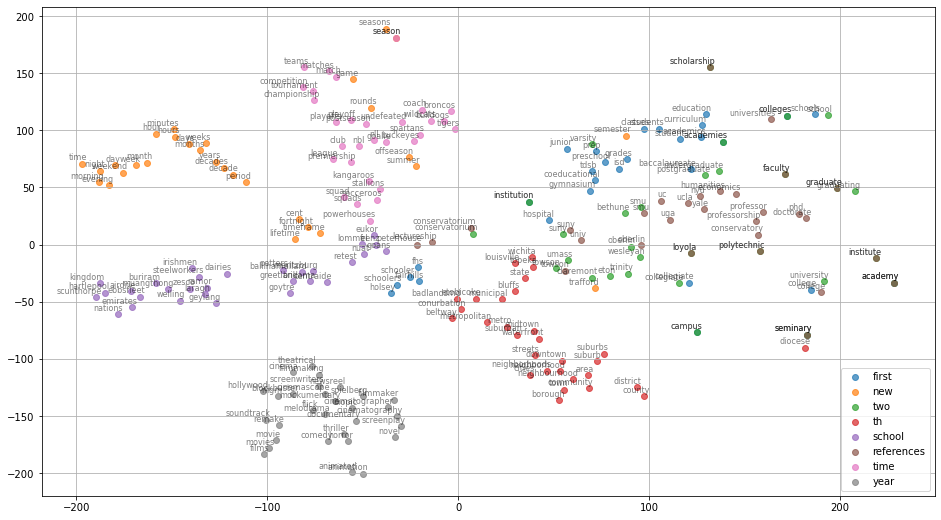

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline  

#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

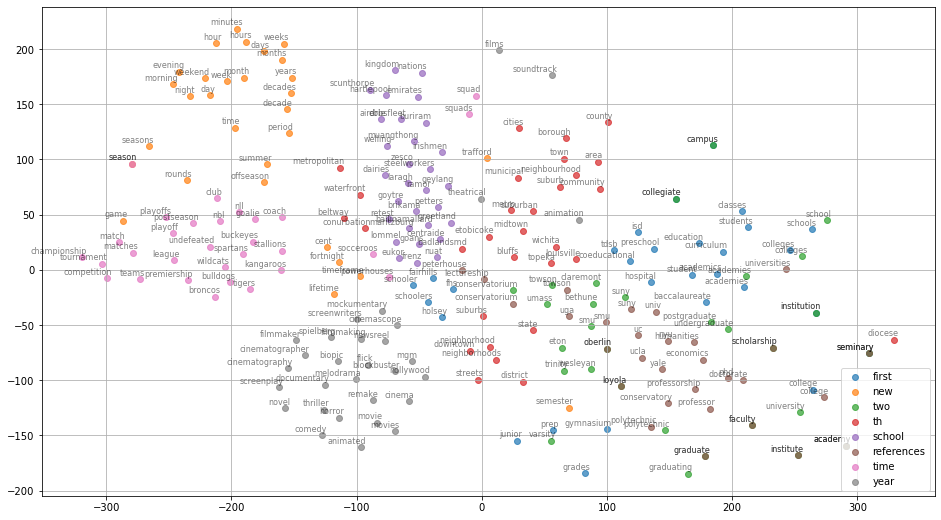

In [ ]:
tsne_model_en_2d = TSNE(perplexity=25, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

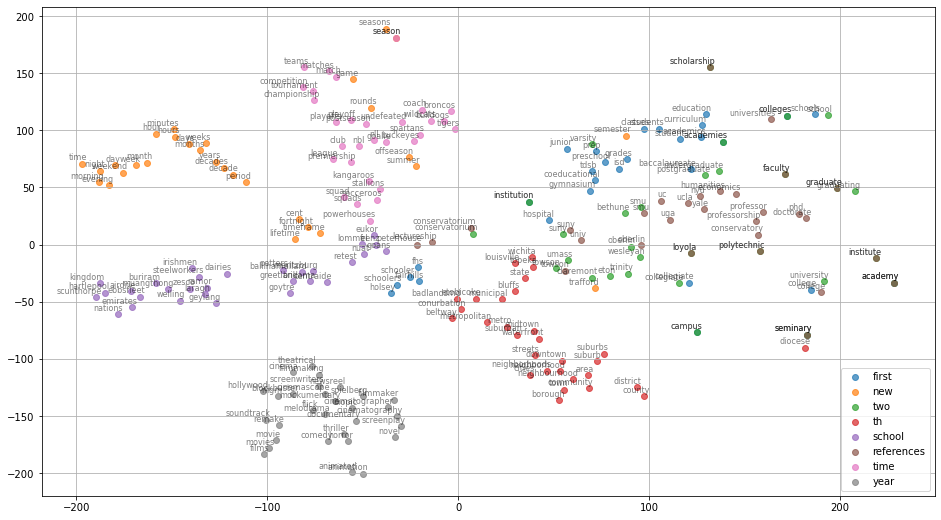

In [ ]:
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

Take a look at the above 3 graphs. We cannto say a higher or lower perplexity is good. It depends on the problem at hand. Here the plots of perplexity 5,10 are much better defined than the one with 25

# 10

In this notebook we will demonstrate how you can use Tensorboard to visualize word embeddings which we created in the Training_embeddings_using_gensim.ipynb notebook

In [ ]:
# To install only the requirements of this notebook, uncomment the lines below and run this cell

# ===========================

!pip install tensorflow==1.14.0
!pip install gensim==3.6.0
!pip install numpy==1.19.5

# ===========================

  Using cached tensorflow-1.14.0-cp36-cp36m-win_amd64.whl (68.3 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.5.0-py3-none-any.whl (10 kB)
  Using cached tensorflow_estimator-1.14.0-py2.py3-none-any.whl (488 kB)
  Using cached Keras_Applications-1.0.8-py3-none-any.whl (50 kB)
  Using cached grpcio-1.39.0-cp36-cp36m-win_amd64.whl (3.2 MB)
  Using cached tensorboard-1.14.0-py3-none-any.whl (3.1 MB)
  Using cached numpy-1.19.5-cp36-cp36m-win_amd64.whl (13.2 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached wrapt-1.12.1-cp36-cp36m-win_amd64.whl
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached protobuf-3.17.3-cp36-cp36m-win_amd64.whl (910 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Using cached h5py-3.1.0-cp36-cp36m-win_amd64.whl (2.7 MB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached Werkzeug-2.0.1-py3-n

In [ ]:
# To install the requirements for the entire chapter, uncomment the lines below and run this cell

# ===========================

# try :
#     import google.colab
#     !curl https://raw.githubusercontent.com/practical-nlp/practical-nlp/master/Ch3/ch3-requirements.txt | xargs -n 1 -L 1 pip install
# except ModuleNotFoundError :
#     !pip install -r "ch3-requirements.txt"

# ===========================

In [ ]:
#making the required imports
import warnings #ignoring the generated warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np
from gensim.models import KeyedVectors
import os

In [ ]:
#Loading the model
cwd=os.getcwd() 
model = KeyedVectors.load_word2vec_format(cwd+'\Models\word2vec_cbow.bin', binary=True)

In [ ]:
#get the model's vocabulary size
max_size = len(model.wv.vocab)-1

In [ ]:
#make a numpy array of 0s with the size of the vocabulary and dimensions of our model
w2v = np.zeros((max_size,model.wv.vector_size))

In [ ]:
#Now we create a new file called metadata.tsv where we save all the words in our model 
#we also store the embedding of each word in the w2v matrix
if not os.path.exists('projections'):
    os.makedirs('projections')
    
with open("projections/metadata.tsv", 'w+',encoding="utf-8") as file_metadata: #changed    added encoding="utf-8"
    
    for i, word in enumerate(model.wv.index2word[:max_size]):
        
        #store the embeddings of the word
        w2v[i] = model.wv[word]
        
        #write the word to a file 
        file_metadata.write(word + '\n')

In [ ]:
#initializing tf session
sess = tf.InteractiveSession()

In [ ]:
#Initialize the tensorflow variable called embeddings that holds the word embeddings:
with tf.device("/cpu:0"):
    embedding = tf.Variable(w2v, trainable=False, name='embedding')

In [ ]:
#Initialize all variables
tf.global_variables_initializer().run()

In [ ]:
#object of the saver class which is actually used for saving and restoring variables to and from our checkpoints
saver = tf.train.Saver()

In [ ]:
#with FileWriter,we save summary and events to the event file
writer = tf.summary.FileWriter('projections', sess.graph)

In [ ]:
# Initialize the projectors and add the embeddings
config = projector.ProjectorConfig()
embed= config.embeddings.add()

In [ ]:
#specify our tensor_name as embedding and metadata_path to the metadata.tsv file
embed.tensor_name = 'embedding'
embed.metadata_path = 'metadata.tsv'

In [ ]:
#save the model
projector.visualize_embeddings(writer, config)

saver.save(sess, 'projections/model.ckpt', global_step=max_size)

'projections/model.ckpt-161017'

Open a terminal window and type the following command

tensorboard --logdir=projections --port=8000

If the tensorboard does not work for you try providing the absolute path for projections and re-run the above command

If youve done everything right until you will get a link in your terminal through which you can access the tensorboard. Click on the link or copy paste it in your browser. You should see something similar to this.
![TensorBoard-1](Images/TensorBoard-1.png)
<br>
In the top right corner near "INACTIVE" click the dropdown arrow. And select PROJECTIONS from te dropdown menu
![TensorBoard-2](Images/TensorBoard-2.png)
<br>
Wait for a few seconds for it to load. You can now see your embeddings there are a lot of setting you can play around and experiment with.
![TensorBoard-3](Images/TensorBoard-3.png)
<br>
Output when we search for a specific word in this case "human" and isolate only those points
![TensorBoard-4](Images/TensorBoard-4.png)

Using Word2vec, prepare word embedding for all the words from webpage: "https://medium.datadriveninvestor.com/convolutional-neural-networks-explained-7fafea4de9c9&quot;
Use  "Beautiful Soup" to extract the data.
Perform all preprocessing steps on this text (Tokenization, stemming, lemmatization) 
As per your word2vec model, find out the most similar words for every word of this article.
Check out what happens for OOV problem.  
Encapsulate the relevant statements in try/except blocks to make sure your code does not throw any exception.

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.models import Word2Vec

# Step 1: Extract text from webpage using Beautiful Soup
url = "https://medium.datadriveninvestor.com/convolutional-neural-networks-explained-7fafea4de9c9"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
text = soup.get_text()

# Step 2: Perform text preprocessing
tokens = word_tokenize(text.lower())
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(stemmer.stem(token)) for token in tokens if token.isalnum()]

# Step 3: Train Word2Vec model
model = Word2Vec([tokens], min_count=1)

# Step 4: Find most similar words for every word
for token in tokens:
    try:
        similar_words = model.wv.most_similar(token)
        print(f"Most similar words for '{token}': {similar_words}")
    except KeyError:
        print(f"No embedding found for '{token}'")
